In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/Java/docs')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs


In [26]:
df = pd.read_csv("../output/SinVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,sin,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
0,Gaussian,0.2,-1.000000,-1.224650e-16,1.00536,-3.87091,3.74197,0.197118,0.196066,0.000101,...,0.000600,0.0001,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
1,Gaussian,0.2,-0.916667,-2.588190e-01,1.00515,-3.39172,4.17697,0.190498,0.189521,0.005284,...,0.001200,0.0006,0.0000,0.0001,0.0000,0.0002,0.0000,0.0000,0.0000,0.0
2,Gaussian,0.2,-0.833333,-5.000000e-01,1.00503,-2.83421,4.67019,0.171220,0.170363,0.010108,...,0.000600,0.0012,0.0005,0.0002,0.0000,0.0001,0.0000,0.0002,0.0000,0.0
3,Gaussian,0.2,-0.750000,-7.071070e-01,1.00505,-2.09179,5.32365,0.140726,0.140019,0.014243,...,0.001900,0.0008,0.0007,0.0006,0.0005,0.0002,0.0000,0.0000,0.0001,0.0
4,Gaussian,0.2,-0.666667,-8.660250e-01,1.00559,-1.32739,6.38455,0.101495,0.100930,0.017407,...,0.002201,0.0016,0.0016,0.0006,0.0004,0.0008,0.0004,0.0004,0.0002,0.0


In [27]:
sorted(df['Noise'].unique())

[0.01, 0.02, 0.05, 0.1, 0.2]

# Deviation vs Uncertainty

In [28]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sorted(df['Noise'].unique()), noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

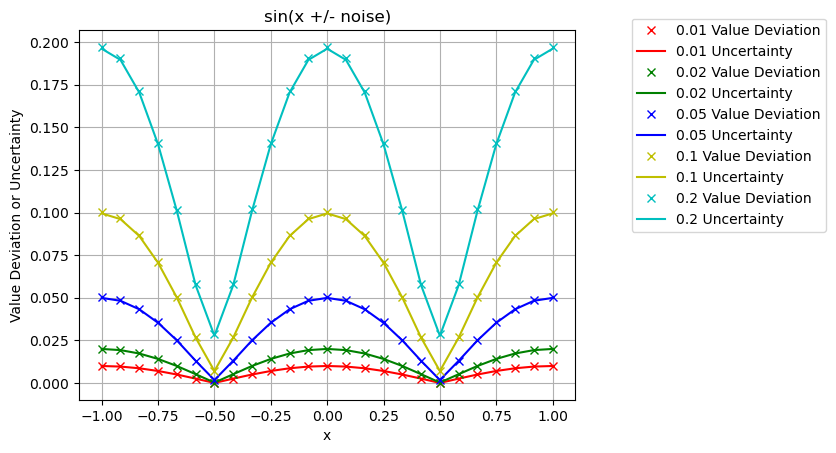

In [29]:
PlotValues()

In [30]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sorted(df['Noise'].unique()),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

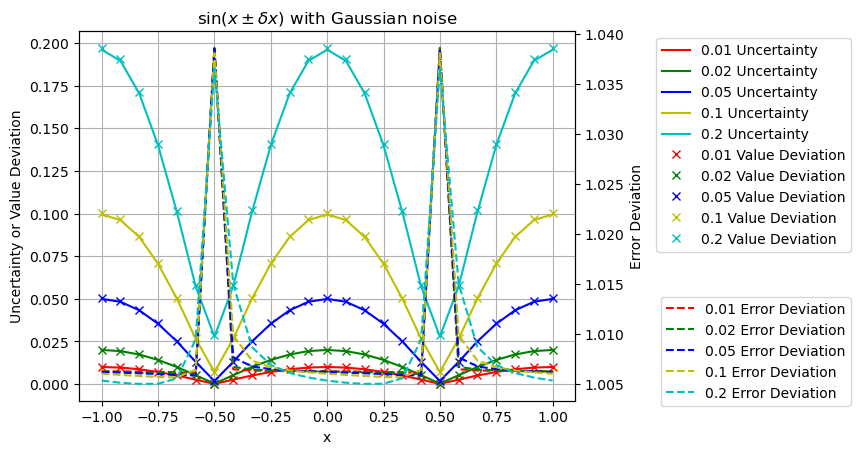

In [31]:
PlotErrorDev()

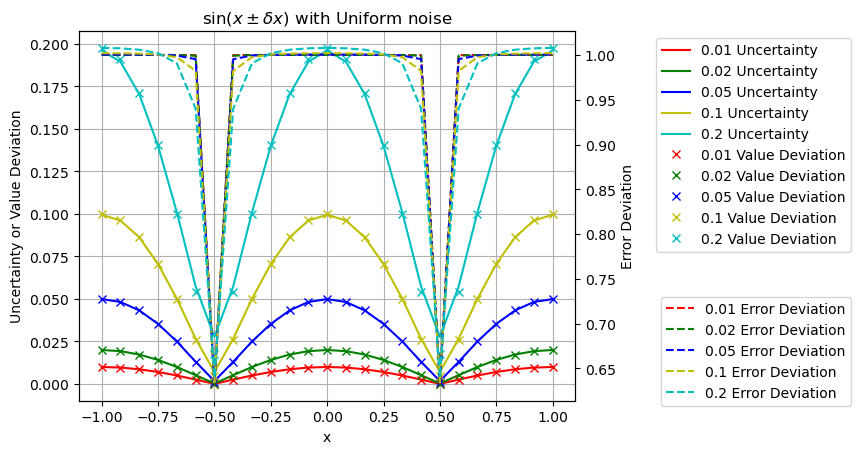

In [32]:
PlotErrorDev('Uniform')

# Mean vs Bias

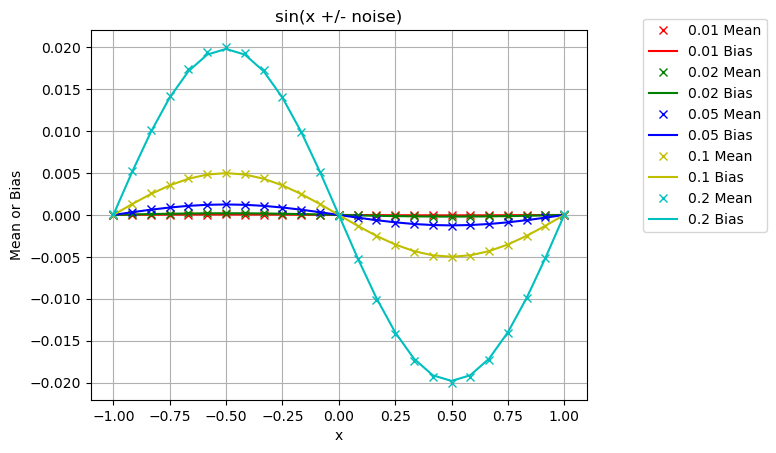

In [33]:
PlotValues(sValue=['Mean', 'Bias'])

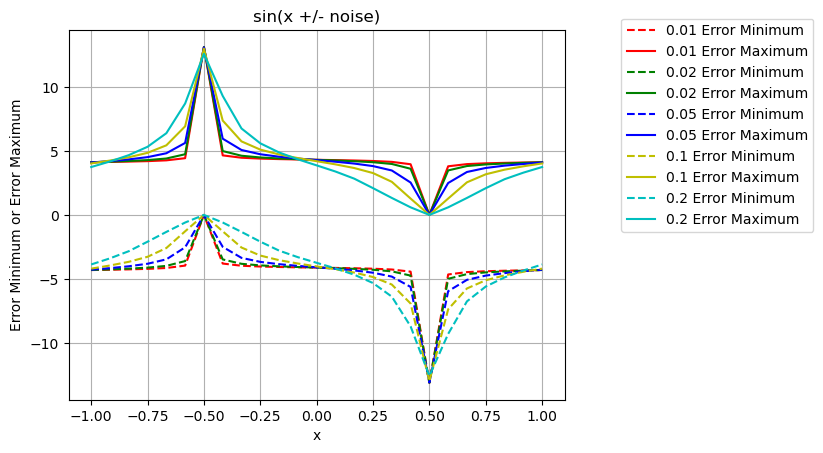

In [48]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'])

# Histogram

In [34]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.0007,0.0010,0.0030,0.0049,0.0073,0.011400,0.015100,0.024100,0.030400,0.037900,...,0.034200,0.029200,0.026100,0.015800,0.011500,0.006400,0.003800,0.003100,0.001100,0.000800
1,0.0004,0.0008,0.0015,0.0036,0.0067,0.011300,0.014500,0.025200,0.031300,0.039800,...,0.032800,0.027700,0.024700,0.016900,0.011200,0.008000,0.004100,0.003400,0.002200,0.000700
2,0.0000,0.0004,0.0006,0.0016,0.0050,0.009300,0.016200,0.022300,0.035100,0.042400,...,0.031200,0.026500,0.022700,0.017300,0.012200,0.008700,0.005000,0.003500,0.002900,0.001900
3,0.0000,0.0000,0.0000,0.0000,0.0013,0.005301,0.014203,0.022204,0.038008,0.048110,...,0.029306,0.024305,0.020604,0.018604,0.011702,0.009002,0.007401,0.003701,0.002501,0.002601
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.051515,0.062419,...,0.025908,0.021507,0.019206,0.017505,0.011904,0.009503,0.007402,0.005802,0.002901,0.002801


In [35]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


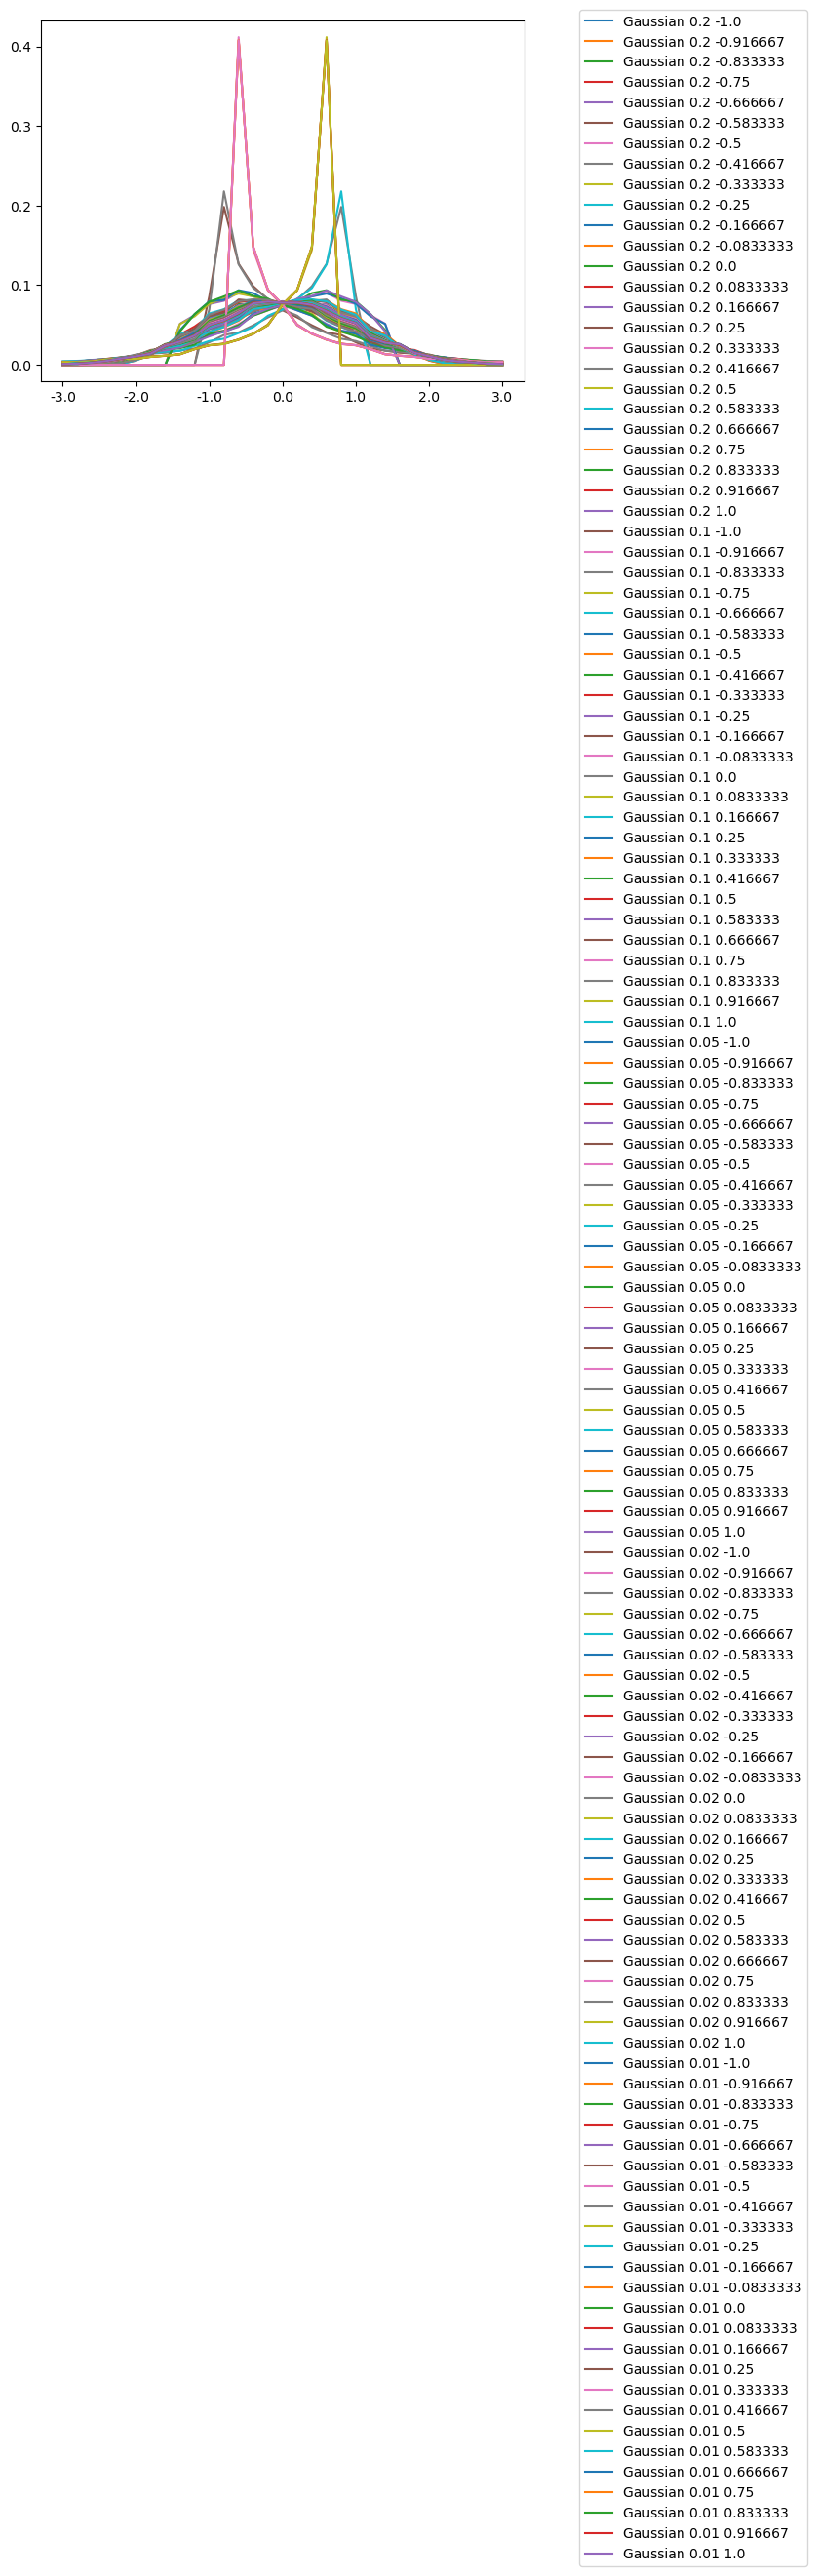

In [36]:
PlotHisto(sNoiseType=['Gaussian'])

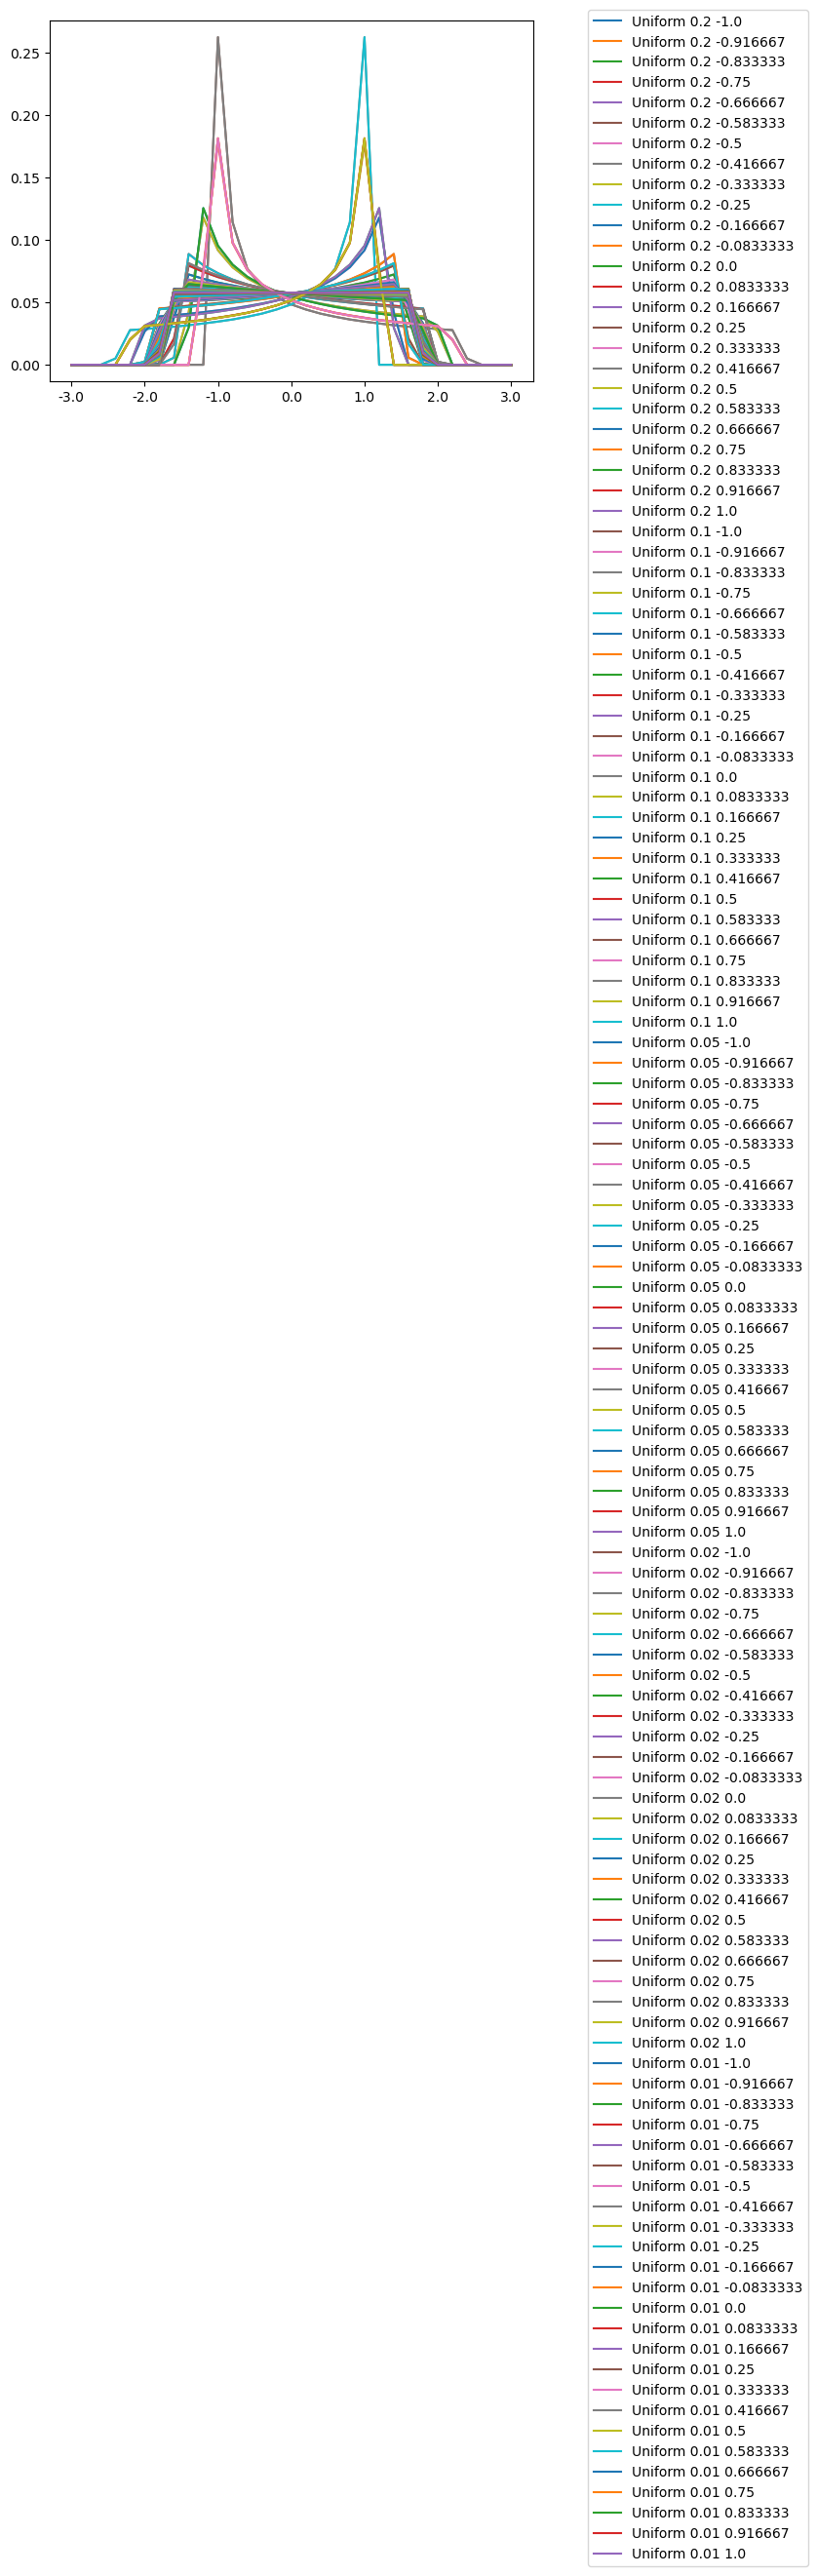

In [37]:
PlotHisto()

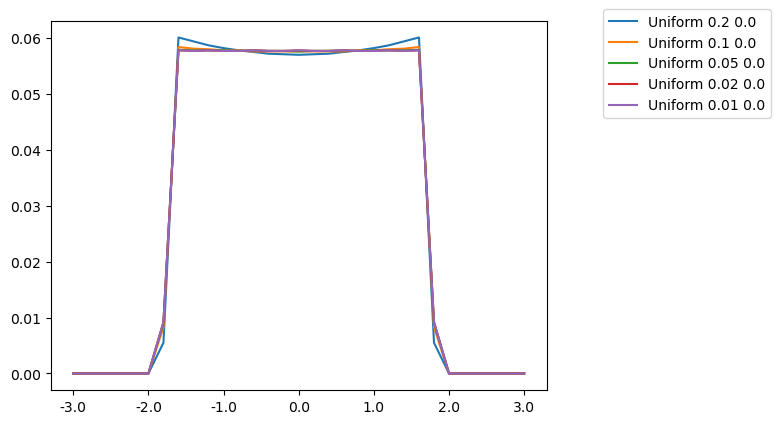

In [38]:
PlotHisto(sX=[0])

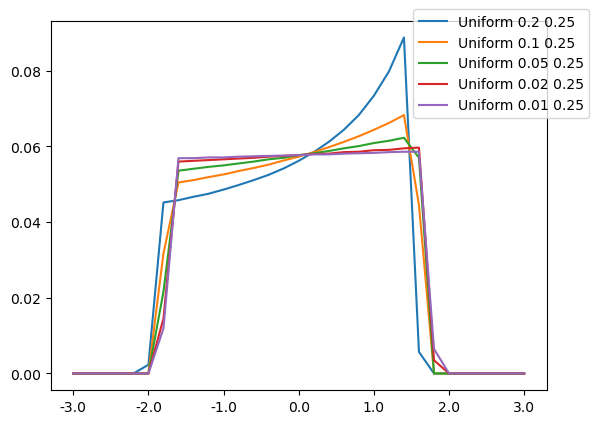

In [39]:
PlotHisto(sX=[0.25])

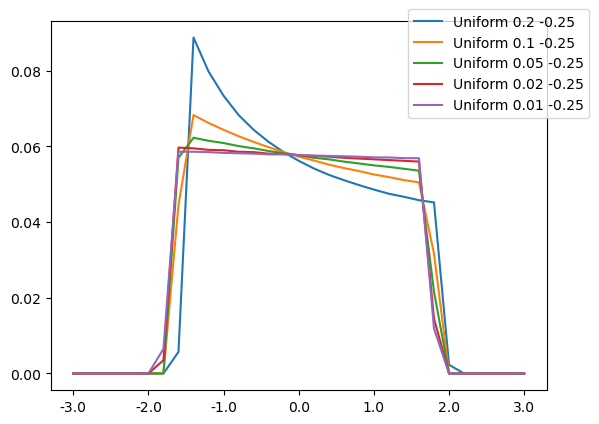

In [40]:
PlotHisto(sX=[-0.25])

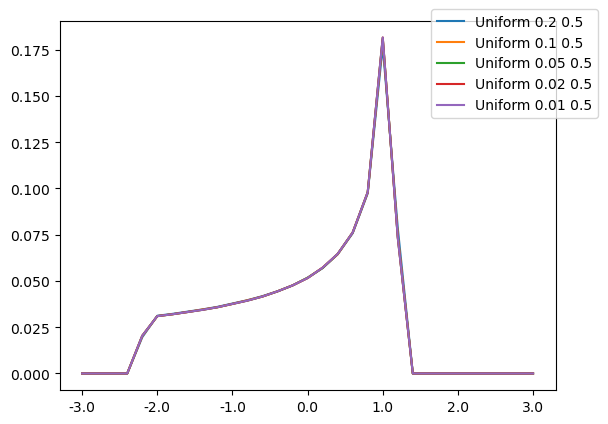

In [41]:
PlotHisto(sX=[0.5])

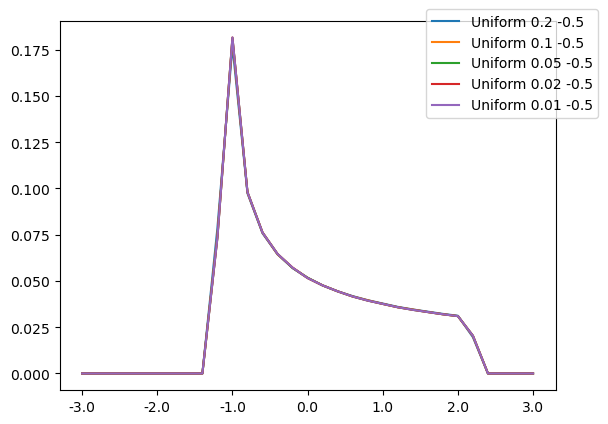

In [42]:
PlotHisto(sX=[-0.5])

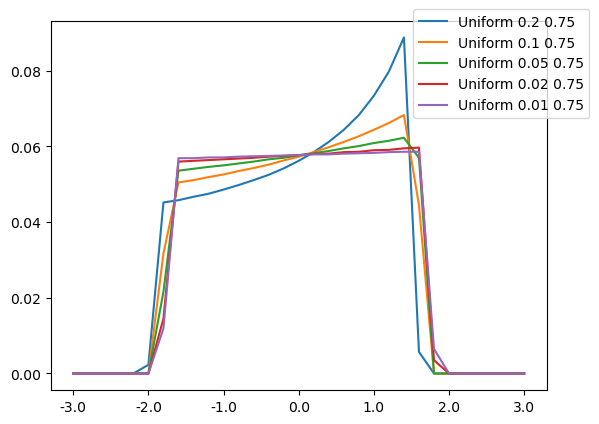

In [43]:
PlotHisto(sX=[0.75])

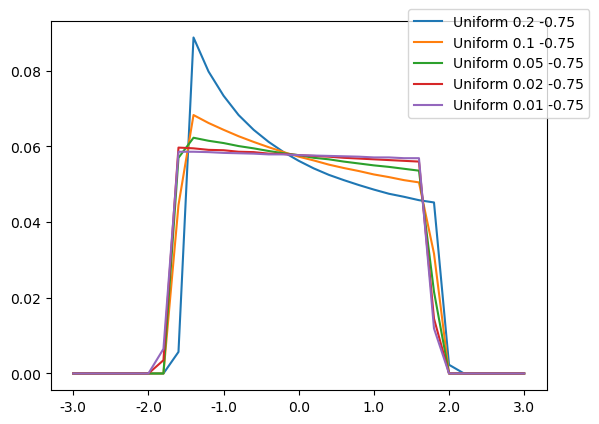

In [44]:
PlotHisto(sX=[-0.75])

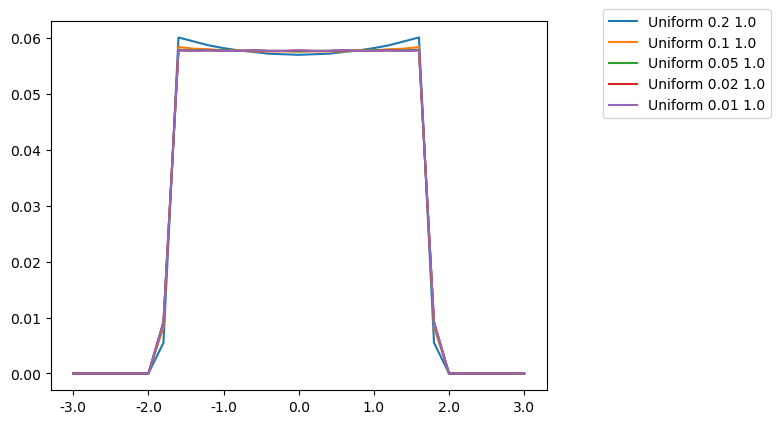

In [45]:
PlotHisto(sX=[+1])

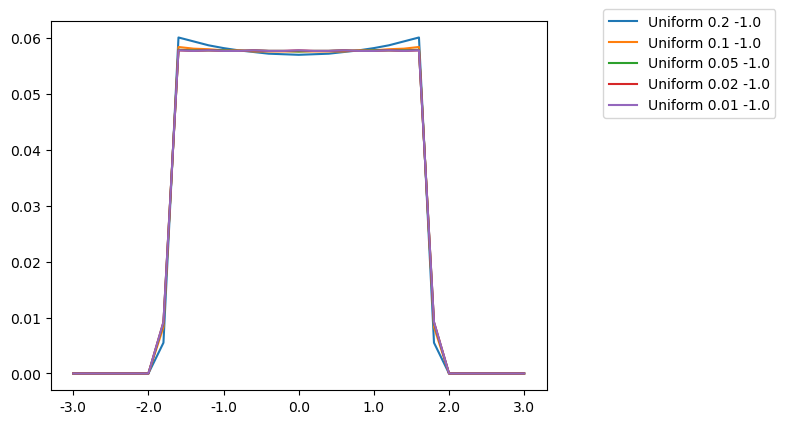

In [46]:
PlotHisto(sX=[-1])